In [52]:
import torch
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random

# 1. Constructing Dataset

In [53]:
# dataset function
def create_dataset():
    x, y, coef = make_regression(n_samples=100, 
                                 n_features=1, 
                                 noise=10, 
                                 coef=True, 
                                 bias=14.5, 
                                 random_state=0)

    # transfer to tensor
    x = torch.tensor(x)
    y = torch.tensor(y)

    return x, y, coef

# dataloader
# load data at given batch size
def data_loader(x, y, batch_size):

    # couting total sample size
    data_len = len(y)
    # data indexing
    data_idx = list(range(data_len))
    # randomize dataset
    random.shuffle(data_idx)
    # calculate total batch
    batch_n = data_len//batch_size

    for index in range(batch_n):

        start = index * batch_size
        end = start + batch_size

        batch_train_x = x[start:end]
        batch_train_y = y[start:end]

        yield batch_train_x, batch_train_y # note: need to use yield

def test01():
    x, y, coef = create_dataset()
    plt.scatter(x,y)
    plt.show()

    for x, y in data_loader(x, y, batch_size=10):
        print(y)




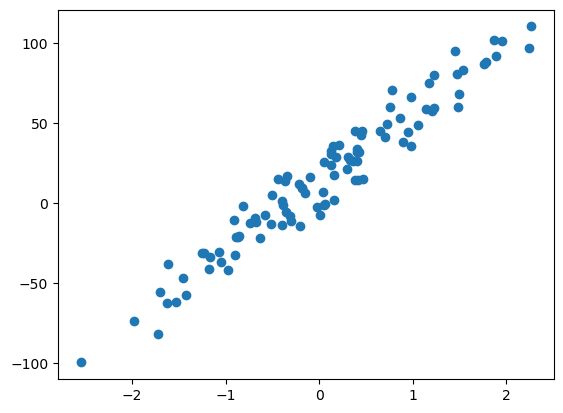

tensor([ -5.4559,  35.8398,  26.0569,  -1.8421, -21.2006,  42.4954, -41.8235,
         32.1104,  35.9511,  -7.8529], dtype=torch.float64)
tensor([-12.9675,  23.8023, -61.9903, -13.8347,  45.1917,  74.9430,   9.3734,
         88.3600,  94.7759,  -9.3148], dtype=torch.float64)
tensor([ 66.2925,  91.9720,  14.7655,  28.6668,  59.6707,  70.2977, 101.3236,
         27.0550,  17.1561,  83.0719], dtype=torch.float64)
tensor([-32.2284,  -7.4182, -36.5545,  44.9770,  -7.2386,  45.2746,  35.8476,
          1.4430,  -0.9726, -31.4581], dtype=torch.float64)
tensor([ 48.8710,  31.9943, -55.8447,  96.7115,  28.5324, -14.1035,  80.0860,
        -20.5527,  86.8595,  14.4728], dtype=torch.float64)
tensor([-10.5618, -57.4901,  15.2315,  37.8229,  58.9522,  33.9549,  14.6882,
        -81.6107,  80.8610,   9.4400], dtype=torch.float64)
tensor([-21.3257,  21.0087,  57.2813, -73.6657, -99.5679, -46.6450,  -2.2548,
          1.6604,  59.4734, 102.0346], dtype=torch.float64)
tensor([110.2472, -12.6052,  -0.79

In [54]:
if __name__ == '__main__':
    test01()

# 2. linear regression function

In [55]:
# regression function
w = torch.tensor(0.1, requires_grad=True, dtype=torch.float64)
b = torch.tensor(0, requires_grad=True, dtype=torch.float64)

def linear_regression(x):
    return w * x + b

# 3. loss function

In [56]:
def square_loss(y_pred, y_true):
    return (y_pred-y_true)**2

# 4. optimization

In [57]:
# stochastic gradient descent
def sgd(lr, batch_size):
    w.data = w.data-lr*w.grad.data / batch_size
    b.data = b.data-lr*b.grad.data / batch_size

# 5. training

In [58]:
def train():
    # loading dataset
    x, y, coef = create_dataset()
    # defing parameters
    epochs = 100
    lr = 1e-2
    epoch_loss = []
    total_loss = 0.0
    train_samples = 0

    for _ in range(epochs):
        for train_x, train_y in data_loader(x, y, batch_size=16):
            
            # 1. feeding training sample into model
            y_pred = linear_regression(train_x)
            # 2. calculate loss
            loss = square_loss(y_pred, train_y.reshape(-1, 1)).sum()
            total_loss += loss.item()
            train_samples += len(train_y)
            # 3. zero gradient 
            if w.grad is not None:
                w.grad.data.zero_()
            if b.grad is not None:
                b.grad.data.zero_()
            
            # 4. auto gradient 
            loss.backward()
            # 5. update parameters
            sgd(lr, batch_size=16)

            print('loss: %.10f' % (total_loss/train_samples)) # average loss

        epoch_loss.append(total_loss / train_samples)
    
    # plotting
    plt.scatter(x,y)
    x = torch.linspace(x.min(), x.max(), 1000)
    y1 = torch.tensor([ v * w + b for v in x])
    y2 = torch.tensor([ v * coef + 14.5 for v in x])

    plt.plot(x, y1, label = 'train')
    plt.plot(x, y2, label = 'true')
    plt.grid()
    plt.legend()
    plt.show()

    # loss function
    plt.plot(range(epochs), epoch_loss)
    plt.grid()
    plt.show()
    

loss: 1296.1368728541
loss: 2436.9092349261
loss: 2223.9904977827
loss: 2226.8678712042
loss: 2346.9798105877
loss: 2059.6439491472
loss: 1913.1633767652
loss: 2027.7041992174
loss: 1958.8407893180
loss: 1936.7456442893
loss: 1958.9884082751
loss: 1836.6773229252
loss: 1759.3602570793
loss: 1794.3016795182
loss: 1748.6094258669
loss: 1724.1062134897
loss: 1721.8975924511
loss: 1647.8982229222
loss: 1596.6618057075
loss: 1606.6673720032
loss: 1572.0590023775
loss: 1548.9866447146
loss: 1538.4987608777
loss: 1487.3909069709
loss: 1449.9917569188
loss: 1449.7954103818
loss: 1422.1944071842
loss: 1401.4321249175
loss: 1388.2123915185
loss: 1350.3343929520
loss: 1321.5352066340
loss: 1316.8093420502
loss: 1294.1922297033
loss: 1275.8265923309
loss: 1262.1376371122
loss: 1232.7909528890
loss: 1209.8420788155
loss: 1203.1523925544
loss: 1184.3003155764
loss: 1168.1665903227
loss: 1154.9868007710
loss: 1131.5367168762
loss: 1112.8040851314
loss: 1105.4094855417
loss: 1089.5032571767
loss: 1075

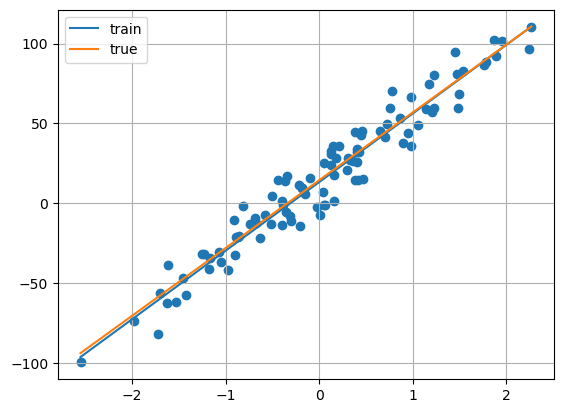

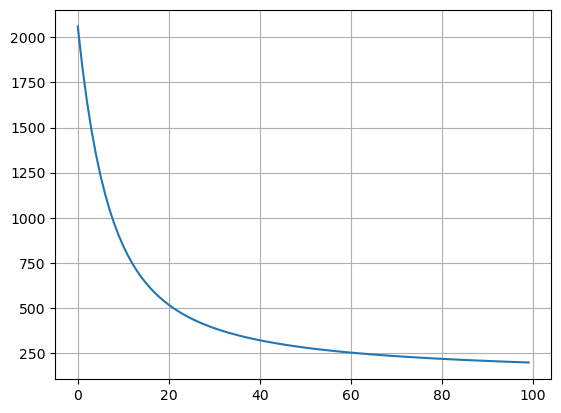

In [59]:
if __name__ == '__main__':
    train()